In [1]:
from numbers import Complex
from collections import namedtuple
import cmath
import sympy
from matplotlib import pyplot
from matplotlib.colors import LinearSegmentedColormap
import numpy
from numpy import e, pi

In [2]:
# set up some basic data to run on
re,im = numpy.mgrid[-2:2:100j, -2:2:100j]
z = re + 1j*im
theta = numpy.angle(z)
r = numpy.abs(z)

In [3]:
# set up some default values
ANGLE_COLORS = 'twilight_shifted_r'
ABS_COLORS = [[0.5]*3 + [0.5]]
EXP_LEVELS = list(range(1, 10)) + [
    exponent * mantissa
    for exponent in (10**n for n in range(1, 10))
    for mantissa in [1.0, 1.5, 2.2, 3.3, 4.7, 6.8] # E6 series
]

In [4]:
DisplayFunc = namedtuple(
    'DisplayFunc',
    'name data angle_colors abs_colors',
    defaults=[ANGLE_COLORS, ABS_COLORS],
)

In [5]:
class ComplexFunction(object):
    def __init__(self, name, data, angle_colors=ANGLE_COLORS, abs_colors=ABS_COLORS):
        self.name = name
        self.data = data
        self.angle_colors = angle_colors
        self.abs_colors = abs_colors
        self.show_colorbar = False
    
    def paint(self, ax):
        ax.set_title(self.name)
        ax.set_xlabel(r'$\operatorname{Re}$ $z$')
        ax.set_ylabel(r'$\operatorname{Im}$ $z$')
        
        # shade by angle:
        shade_angle = ax.pcolormesh(
            re, im,
            numpy.angle(self.data),
            cmap=self.angle_colors,
            vmin=-pi, vmax=pi,
            shading='gouraud',
        )
        
        # contour by magnitude:
        contour_magnitude = ax.contour(
            re, im,
            numpy.abs(self.data),
            colors=self.abs_colors,
            levels=EXP_LEVELS,
        )
        
        # size to fit data
        ax.axis('scaled')

        if self.show_colorbar:
            cb = pyplot.colorbar(shade_angle, ax=ax, orientation='horizontal')
            cb.set_label(r'$\operatorname{angle}$ $z$')

        

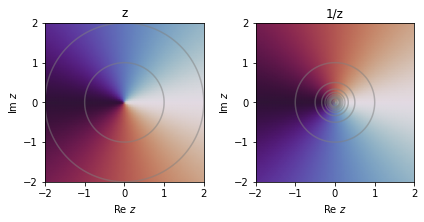

In [6]:
funcs = [
    ComplexFunction('z', z),
    ComplexFunction('1/z', 1/z),
]

def compare_funcs(funcs):
    row_max = 3
    ncols = min(len(funcs),row_max)
    nrows = ((len(funcs)-1)//row_max)+1
    fig, axs = pyplot.subplots(nrows=nrows, ncols=ncols)
    if ncols < 2:
        axs = [axs]
    elif nrows > 1:
        axs = [ax for row in axs for ax in row]

    for func, ax in zip(funcs, axs):
        func.paint(ax)
    fig.tight_layout()

compare_funcs(funcs)

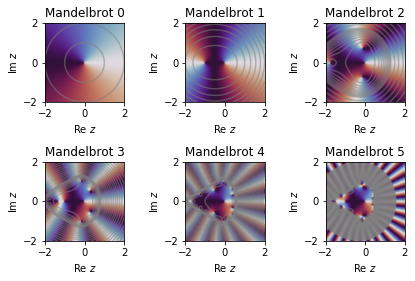

In [7]:
def mand(z, n):
    if n<=0:
        return z
    else:
        return mand(z, n-1)**2 + z

compare_funcs([
    ComplexFunction(f'Mandelbrot {n}', mand(z, n))
    for n in range(6)
])

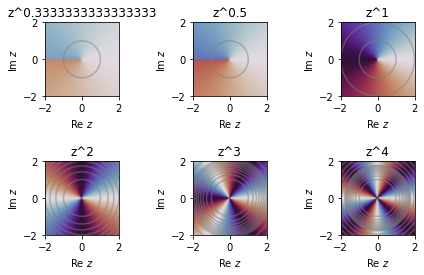

In [11]:
compare_funcs([
    ComplexFunction(f'z^{a}', z**a)
    for a in [1/3, 1/2, 1, 2, 3, 4]
])